
### 1. **What does R-squared represent in a regression model?**

**Answer:** R-squared (coefficient of determination) represents the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.

---

### 2. **What are the assumptions of linear regression?**

**Answer:** The key assumptions are:

1. Linearity
2. Independence of errors
3. Homoscedasticity (constant variance of errors)
4. Normality of residuals
5. No multicollinearity among independent variables

---

### 3. **What is the difference between R-squared and Adjusted R-squared?**

**Answer:** R-squared increases with more predictors, even if they're not useful. Adjusted R-squared penalizes unnecessary variables and only increases when a new predictor improves the model more than expected by chance.

---

### 4. **Why do we use Mean Squared Error (MSE)?**

**Answer:** MSE measures the average squared difference between actual and predicted values. It emphasizes larger errors due to squaring, helping in optimization and model evaluation.

---

### 5. **What does an Adjusted R-squared value of 0.85 indicate?**

**Answer:** It means that approximately 85% of the variability in the target variable is explained by the regression model, adjusted for the number of predictors. It's a sign of a strong model fit.

---

### 6. **How do we check for normality of residuals in linear regression?**

**Answer:** Common methods include:

* Plotting a histogram or Q-Q plot of residuals
* Shapiro-Wilk or Kolmogorov-Smirnov test
* Checking skewness and kurtosis

---

### 7. **What is multicollinearity, and how does it impact regression?**

**Answer:** Multicollinearity occurs when independent variables are highly correlated. It can make coefficient estimates unstable and inflate standard errors, reducing model interpretability.

---

### 8. **What is Mean Absolute Error (MAE)?**

**Answer:** MAE is the average of absolute differences between predicted and actual values. It gives equal weight to all errors and is easy to interpret.

---

### 9. **What are the benefits of using an ML pipeline?**

**Answer:** ML pipelines ensure:

* Reproducibility
* Automation of preprocessing
* Cleaner code
* Easier hyperparameter tuning
* Consistent application across training and testing

---

### 10. **Why is RMSE considered more interpretable than MSE?**

**Answer:** RMSE (Root Mean Squared Error) is the square root of MSE and has the same unit as the target variable, making it more directly interpretable in context.

---

### 11. **What is pickling in Python, and how is it useful in ML?**

**Answer:** Pickling serializes Python objects to a byte stream. In ML, it’s used to save trained models so they can be reused later without retraining.

---

### 12. **What does a high R-squared value mean?**

**Answer:** A high R-squared indicates that a large proportion of the variance in the dependent variable is explained by the model. But it doesn't guarantee good predictions or a correct model.

---

### 13. **What happens if linear regression assumptions are violated?**

**Answer:** Violations can lead to biased, inconsistent, or inefficient estimates, poor predictions, and incorrect inferences (e.g., wrong p-values).

---

### 14. **How can we address multicollinearity in regression?**

**Answer:** Solutions include:

* Removing highly correlated variables
* Using Principal Component Analysis (PCA)
* Applying Ridge or Lasso regression

---

### 15. **How can feature selection improve model performance in regression analysis?**

**Answer:** It reduces overfitting, improves model interpretability, speeds up training, and can enhance prediction accuracy by removing irrelevant or redundant features.

---

### 16. **How is Adjusted R-squared calculated?**

**Answer:**

$$
\text{Adjusted } R^2 = 1 - \left[\frac{(1 - R^2)(n - 1)}{n - p - 1}\right]
$$

Where:

* $n$ = number of observations
* $p$ = number of predictors

---

### 17. **Why is MSE sensitive to outliers?**

**Answer:** Because it squares the error terms, large errors (outliers) have a disproportionately large impact on the MSE.

---

### 18. **What is the role of homoscedasticity in linear regression?**

**Answer:** Homoscedasticity ensures that the variance of residuals is constant across all levels of independent variables. Violation affects the validity of statistical tests and confidence intervals.

---

### 19. **What is Root Mean Squared Error (RMSE)?**

**Answer:** RMSE is the square root of MSE. It represents the standard deviation of the residuals and shows how much prediction errors deviate, on average, from actual values.

---

### 20. **Why is pickling considered risky?**

**Answer:** Pickled files can execute arbitrary code when unpickled, posing a security risk. Never unpickle data from untrusted sources.

---

### 21. **What alternatives exist to pickling for saving ML models?**

**Answer:** Safer alternatives include:

* **Joblib** (for large NumPy arrays)
* **ONNX** (Open Neural Network Exchange)
* **HDF5** (e.g., with Keras models)
* **PMML** (Predictive Model Markup Language)
* **Saving to JSON** or using libraries like `skops` or `mlflow`

---

### 22. **What is heteroscedasticity, and why is it a problem?**

**Answer:** Heteroscedasticity means unequal variance of residuals. It violates regression assumptions, leading to inefficient estimates and invalid confidence intervals.

---

### 23. **How can interaction terms enhance a regression model's predictive power?**

**Answer:** Interaction terms capture the combined effect of two or more variables that is not explained by their individual effects, revealing more complex relationships and improving accuracy.

---



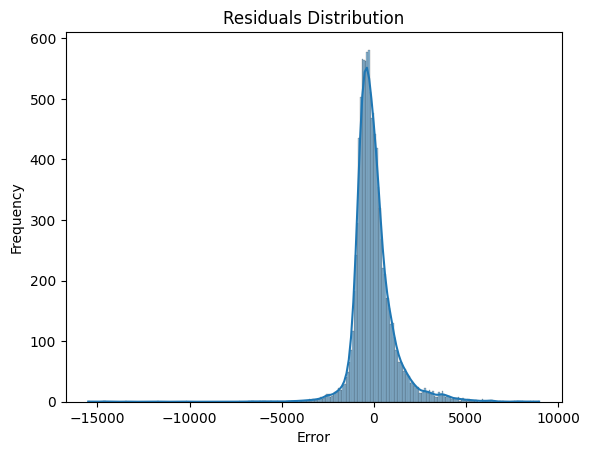

In [1]:
#1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
diamonds = sns.load_dataset('diamonds').dropna()

# Convert categorical variables
diamonds = pd.get_dummies(diamonds, drop_first=True)

# Features and target
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residual distribution
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()



In [2]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MSE: 1288705.4778516742
MAE: 737.1513665933269
RMSE: 1135.2116445190625


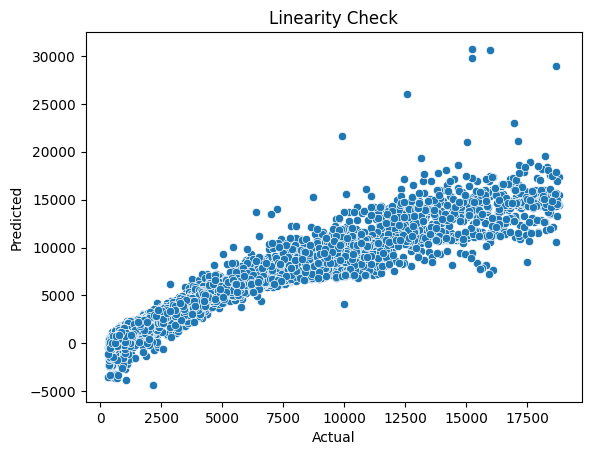

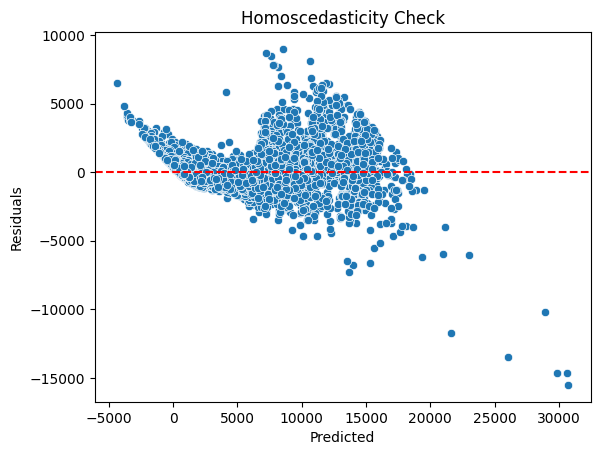

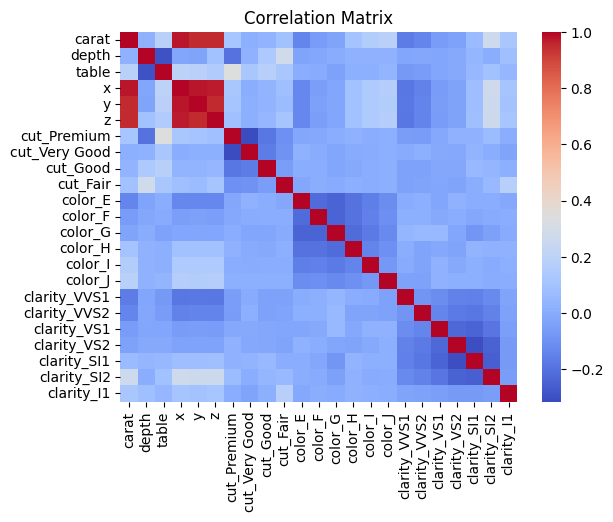

In [3]:
#3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Linearity (predicted vs actual)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linearity Check")
plt.show()

# Homoscedasticity (residuals vs predicted)
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Multicollinearity check with correlation matrix
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [31]:
#4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd

# Load and preprocess dataset
diamonds = sns.load_dataset('diamonds').dropna()
diamonds = pd.get_dummies(diamonds, drop_first=True)

X = diamonds.drop('price', axis=1)
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

# Evaluate each model using pipeline
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{name} R-squared: {r2_score(y_test, y_pred):.4f}")


LinearRegression R-squared: 0.9189
Ridge R-squared: 0.9189
Lasso R-squared: 0.9189


In [7]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.
from sklearn.linear_model import LinearRegression

# Use 'carat' to predict 'price'
X_simple = diamonds[['carat']]
y_simple = diamonds['price']

model = LinearRegression()
model.fit(X_simple, y_simple)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X_simple, y_simple))


Coefficient: 7756.425617968435
Intercept: -2256.360580045403
R-squared: 0.8493305264354858


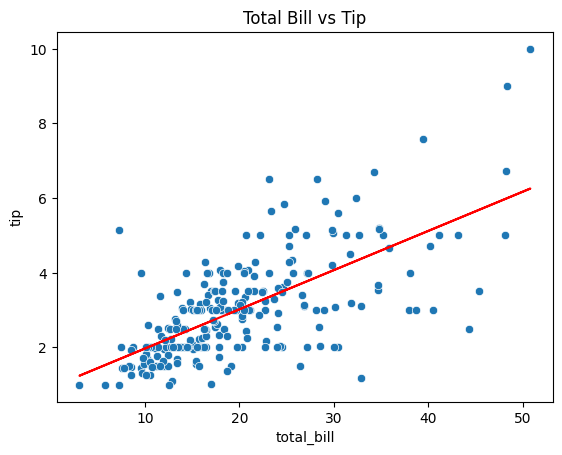

In [8]:
#6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.
tips = sns.load_dataset("tips")
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], y_pred, color='red')
plt.title("Total Bill vs Tip")
plt.show()


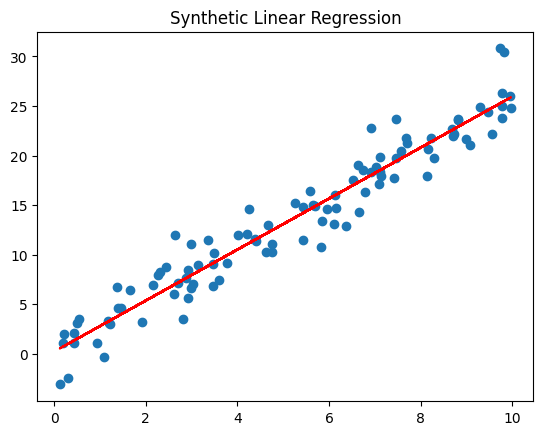

In [9]:
#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Synthetic Linear Regression")
plt.show()


In [10]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file.
import pickle

with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)


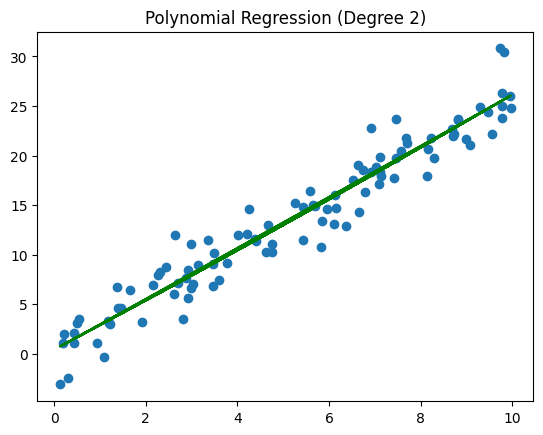

In [11]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_poly_pred, color='green')
plt.title("Polynomial Regression (Degree 2)")
plt.show()


In [12]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.
X = np.random.rand(50, 1) * 20
y = 5 * X + np.random.randn(50, 1) * 4

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])


Coefficient: 5.120343592847092
Intercept: -0.6619949822845399


In [13]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.
degrees = [1, 2, 3, 5]
for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)
    score = model.score(X, y)
    print(f"Degree {d}: R2 Score = {score:.4f}")


Degree 1: R2 Score = 0.9777
Degree 2: R2 Score = 0.9778
Degree 3: R2 Score = 0.9779
Degree 5: R2 Score = 0.9789


In [14]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.
X_two = diamonds[['carat', 'depth']]
y = diamonds['price']

model = LinearRegression()
model.fit(X_two, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X_two, y))


Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826016815
R-squared: 0.8506754571636563


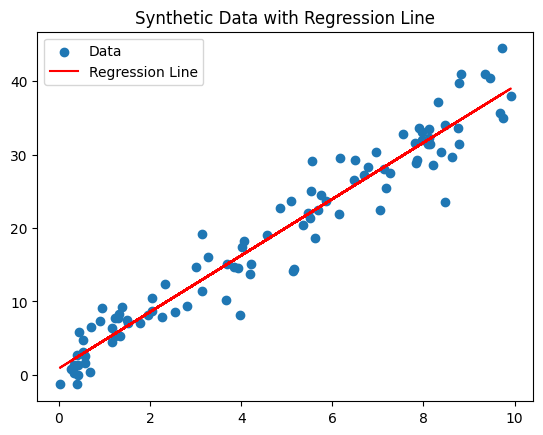

In [15]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.
X = np.random.rand(100, 1) * 10
y = 4 * X + np.random.randn(100, 1) * 3

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.legend()
plt.title("Synthetic Data with Regression Line")
plt.show()


In [30]:
#14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load dataset
diamonds = sns.load_dataset('diamonds').dropna()

# Drop target column
X = diamonds.drop('price', axis=1)

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure all data is float type
X_encoded = X_encoded.astype(float)

# Add constant column for VIF
X_encoded_const = add_constant(X_encoded)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_encoded_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_encoded_const.values, i)
                   for i in range(X_encoded_const.shape[1])]

print(vif_data)



          Feature          VIF
0           const  6430.220026
1           carat    22.439582
2           depth     1.782401
3           table     1.787765
4               x    57.518327
5               y    20.592160
6               z    23.585582
7     cut_Premium     1.711002
8   cut_Very Good     1.486059
9        cut_Good     1.431525
10       cut_Fair     1.364971
11        color_E     2.009954
12        color_F     2.013118
13        color_G     2.194151
14        color_H     1.951752
15        color_I     1.710211
16        color_J     1.423173
17   clarity_VVS1     2.848415
18   clarity_VVS2     3.507753
19    clarity_VS1     4.836219
20    clarity_VS2     6.302257
21    clarity_SI1     6.687591
22    clarity_SI2     5.563908
23     clarity_I1     1.489810


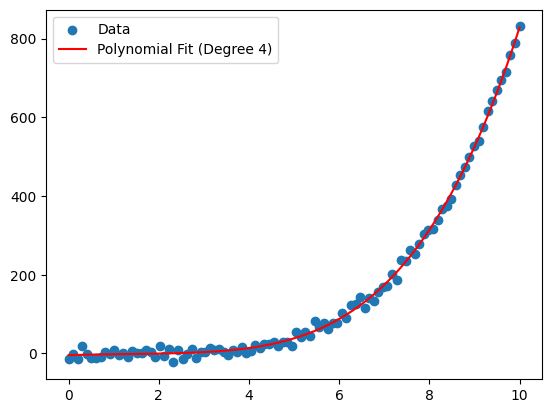

In [17]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 - 3*X + 0.5*X**2 - 0.2*X**3 + 0.1*X**4 + np.random.randn(100, 1)*10

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Polynomial Fit (Degree 4)")
plt.legend()
plt.show()


In [18]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

diamonds = sns.load_dataset('diamonds').dropna()
diamonds = pd.get_dummies(diamonds, drop_first=True)

X = diamonds.drop('price', axis=1)
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
print("R-squared:", pipeline.score(X_test, y_test))


R-squared: 0.9189331350419387


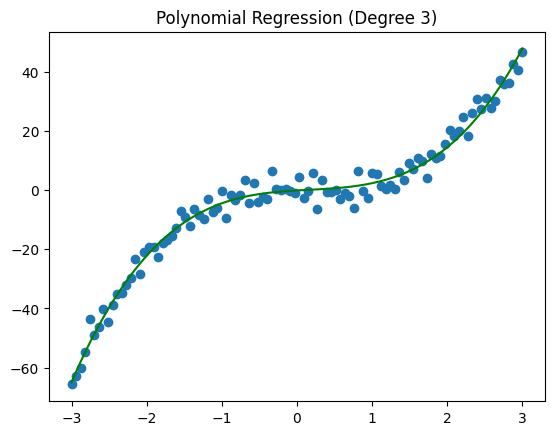

In [19]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**3 - X**2 + X + np.random.randn(100, 1) * 3

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, color='green')
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [20]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=1)
model = LinearRegression()
model.fit(X, y)

print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared: 0.9837816216612021
Coefficients: [ 8.23155766 51.62669014 35.68489779 26.46372731 22.49300908]


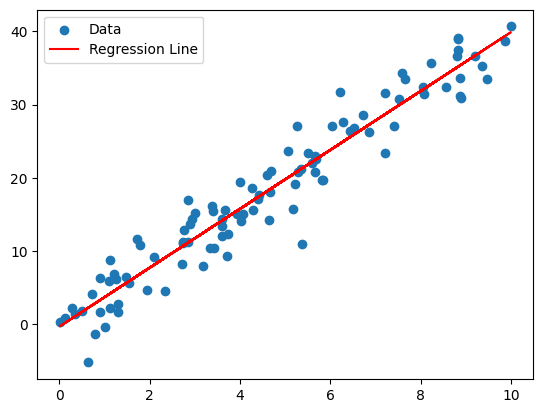

In [21]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.
X = np.random.rand(100, 1) * 10
y = 4 * X + np.random.randn(100, 1) * 3

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.legend()
plt.show()


In [22]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.
X, y = make_regression(n_samples=100, n_features=3, noise=5, random_state=42)
model = LinearRegression().fit(X, y)

print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared: 0.9963795480524085
Coefficients: [28.26033918 74.5265009  18.2711376 ]


In [23]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.
import joblib
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression().fit(X, y)

# Save
joblib.dump(model, 'model.joblib')

# Load
loaded_model = joblib.load('model.joblib')
print("Loaded model R-squared:", loaded_model.score(X, y))


Loaded model R-squared: 0.9963795480524085


In [24]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.
tips = sns.load_dataset('tips')
tips = pd.get_dummies(tips, drop_first=True)

X = tips.drop('tip', axis=1)
y = tips['tip']

model = LinearRegression().fit(X, y)
print("R-squared:", model.score(X, y))

R-squared: 0.47007812322060794


In [25]:
#23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.
from sklearn.linear_model import Ridge

X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=0)

lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)

print("Linear Regression Coefficients:", lr.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)

print("Linear R2:", lr.score(X, y))
print("Ridge R2:", ridge.score(X, y))


Linear Regression Coefficients: [40.22259987  8.10224549 61.74228447]
Ridge Regression Coefficients: [39.76232468  8.07835532 61.13140121]
Linear R2: 0.9830600274277229
Ridge R2: 0.9829576421704679


In [26]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.
from sklearn.model_selection import cross_val_score

X, y = make_regression(n_samples=100, n_features=3, noise=15, random_state=42)
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-validated R-squared scores:", scores)
print("Average R2:", scores.mean())


Cross-validated R-squared scores: [0.95501713 0.96479105 0.97774659 0.96496706 0.94746381]
Average R2: 0.9619971280623792


In [27]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.
degrees = [1, 2, 3, 4, 5]
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X**3 - 2 * X**2 + X + np.random.randn(100, 1) * 10

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {d}: R-squared = {model.score(X_poly, y):.4f}")


Degree 1: R-squared = 0.8300
Degree 2: R-squared = 0.9946
Degree 3: R-squared = 0.9999
Degree 4: R-squared = 0.9999
Degree 5: R-squared = 0.9999
